# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Mengetahui proyeksi kerja pada bidang Data menjadi salah satu alasan mendasar melakukan scrapping website jasa iklan lowongan pekerjaan. Terutama bagi yang menekuni bidang ***Data Science***. 

Kalibrr (https://www.kalibrr.id/) merupakan salah satu website yang menyedikan jasa bagi ***jobseeker***. Berbagai bidang, termasuk bidang Data juga terliput didalamnya. Website ini menyediakan informasi lengkap, mulai dari jenis pekerjaan, lokasi, ***deadline submission***, kualifikasi calon pekerja, deskripsi pekerjaan, dan masih banyak informasi yang lainnya.

Pada kesempatan ini, akan dilakukan pengambilan data `title pekerjaan` , `lokasi pekerjaan` , `tanggal pekerjaan di post dan dealine submit permohonan`, serta `perusahaan` dari website Kalibbr. Dimana salah satu tujuannya ialah mengetahui proyeksi lokasi strategis lowongan pekerjaan bidang Data.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests
 
url_get = requests.get('https://www.kalibrr.id/job-board/te/data/1')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html><html lang="en"><head><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><script type="application/ld+json">{\n    "@context": "https://schema.org",\n    "@type": "WebSite",\n    "url": "https://www.kalibrr.com",\n    "potentialAction": [\n      {\n        "@type": "SearchAction",\n        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",\n        "query-input": "required name=search_term_string"\n      }\n     ]\n  }</script><meta property="og:i'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Dalam mencari kata kunci yang tepat agar dapat melakukan ekstraksi data, maka perlu meninjau website **Kalibrr**. 

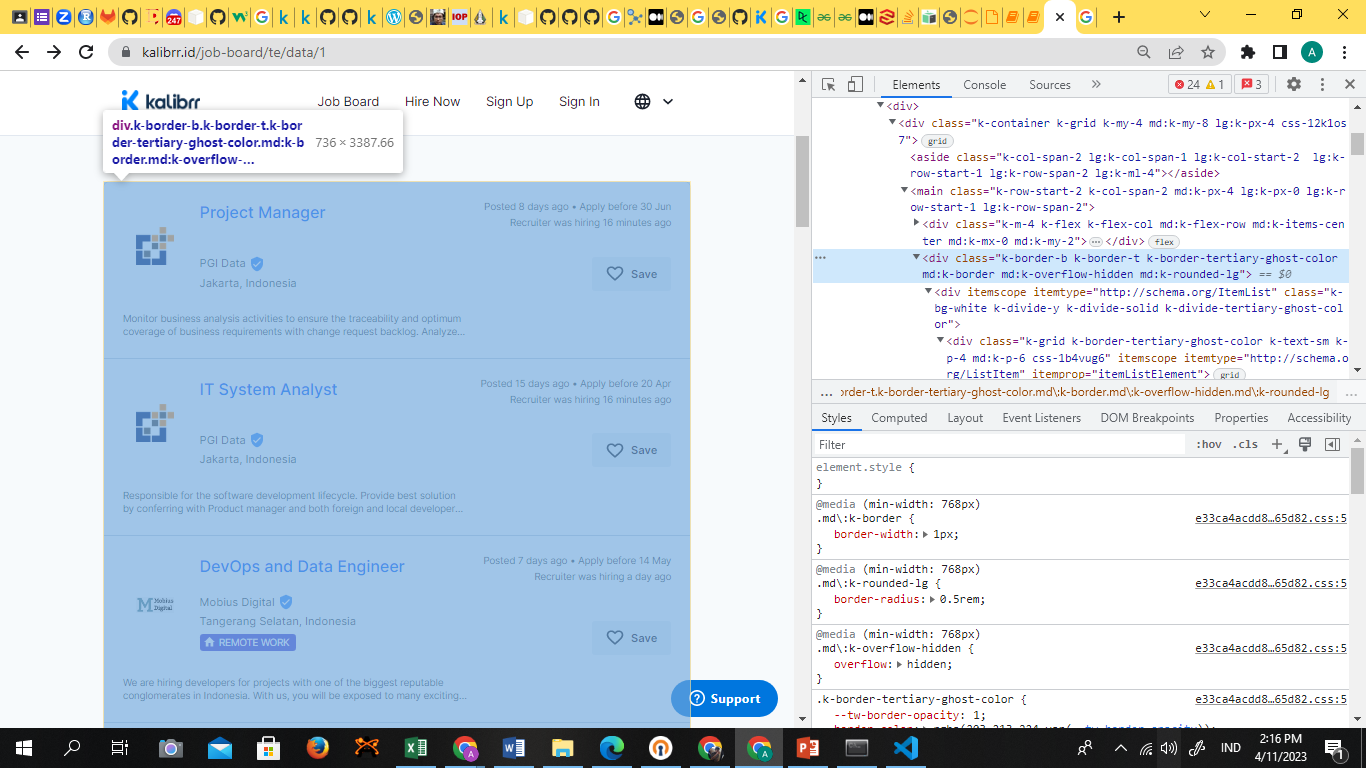

Dari gambar terkait website yang ditinjau, bahwa informasi `title pekerjaan` , `lokasi pekerjaan` , `tanggal pekerjaan di post dan dealine submit permohonan`, serta `perusahaan` didapat pada kolom `div` dengan class `k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg`

In [5]:
table = soup.find('div', attrs = {'class': "k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg"})
print(table.prettify()[1:])

div class="k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg">
 <div class="k-bg-white k-divide-y k-divide-solid k-divide-tertiary-ghost-color" itemscope="" itemtype="http://schema.org/ItemList">
  <style data-emotion="css 1b4vug6">
   .css-1b4vug6{grid-template-columns:5rem 1rem auto 1rem max-content;grid-template-rows:auto 0.25rem auto;}
  </style>
  <div class="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6" itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem">
   <a class="k-bg-white k-flex k-items-center k-flex-shrink k-justify-center k-text-4xl k-text-subdued k-overflow-hidden k-px-4 k-py-2 k-row-span-4" href="/c/pgi-data/jobs">
    <div>
     <img alt="PGI Data" class="k-block k-max-w-full k-max-h-full k-bg-white k-mx-auto" decoding="async" height="80" loading="eager" src="https://rec-data.kalibrr.com/www.kalibrr.com/logos/Z7AL3F4XGKPLCEW9TFDFDZK33247MQ8J9PSHES26-6080167e.png" 

Dari `table`, ingin diambil informasi yang dikehendaki saja. Sehingga dilakukan kembali pencarian kata kuncinya.

In [14]:
#1 title pekerjaan
title = table.find_all('a', attrs={'itemprop':"name"})[1].text
title

'IT System Analyst'

In [15]:
#2 lokasi perusahaan
lokasi = table.find_all('a', attrs={"class": "k-text-subdued k-block"})[1].text
lokasi

'Jakarta, Indonesia'

In [16]:
#3 tanggal pekerjaan di post dan dealine submit permohonan
postNdl = table.find_all('span', attrs={'class' : 'k-block k-mb-1'})[0].text
postNdl

'Posted 8 days ago • Apply before 29 Jun'

In [18]:
#4 perusahaan
perusahaan = table.find_all('span', attrs={'class' : 'k-inline-flex k-items-center k-mb-1'})[0].text
perusahaan

'PGI Data'

Setelah mengetahui kata kunci yang tepat dari tiap informasi yang dikehendaki. Maka, mengetahui panjang/jumlah informasi setiap halaman dari website perlu dilakukan agar bisa dilakukan proses **scrapping** dengan prosedur **looping**.

In [19]:
row = table.find_all('a', attrs={'itemprop':"name"})
row_length = len(row)
row_length

15

Melihat kurangnya informasi yang disediakan tiap halaman, maka dilakukan scrapping sebanyak 15 halaman. Agar data lebih dapat mendeskripsikan tujuan scrapping.

**Code Proses Scrapping**

Generate Link:
 - Langkah pertama ialah membuat link yang menuju ke 15 halaman dari website **Kalibrr**.
 - Pembuatan link dilakukan dengan metode ***looping*** dengan mengubah halaman pada linknya.
 - Hasil link disimpan dalam bentuk data list di template `url_list`

Scrapping 15 Halaman **Kalibrr**:
 - Pertama ialah membuat tempat untuk menyimpan data dari hasil scrapping yakni `temp` yang menyimpan data `list` dari `tuple`
 - Kemudian, dilakukan ***looping*** bertingkat
     - looping pertama untuk mengambil tiap link/url menuju halaman tiap website dari data di `url_list`
     - looping kedua untuk mengambil semua jenis data dikehendaki yang tersedia pada tiap halamannya melalui `row_length`
 - Data hasil scrapping melalui looping akan ditambahkan dalam `temp` dalam bentuk `tuple`
 - Setiap iterasi pada looping kedua akan mengambil semua data yang dikehendaki dalam satu `tuple` dan menjadi satu baris pada `tabel`

In [21]:
#Membuat Link menuju 15 halaman dari Website Kalibrr
url_list = []
url = 'https://www.kalibrr.id/job-board/te/data/'
for hlm in range(1,16): 
    url_nyar = url+str(hlm)
    url_list.append(url_nyar)

#Proses Scrapping
temp = []
for i in url_list:
    url_get = requests.get(i)
    soup = BeautifulSoup(url_get.content,"html.parser")
    table = soup.find('div', attrs = {'class': "k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg"})
    row = table.find_all('a', attrs={'itemprop':"name"})
    row_length = len(row)

    for i in range(0, row_length):

        #scrapping process
        #title pekerjaan
        title = table.find_all('a', attrs={'itemprop':"name"})[i].text
        #lokasi perusahaan
        lokasi = table.find_all('a', attrs={"class": "k-text-subdued k-block"})[i].text
        lokasi = lokasi.strip()
        #tanggal pekerjaan di post dan dealine submit permohonan
        postNdl = table.find_all('span', attrs={'class' : 'k-block k-mb-1'})[i].text
        postNdl = postNdl.strip()
        #perusahaan
        perusahaan = table.find_all('span', attrs={'class' : 'k-inline-flex k-items-center k-mb-1'})[i].text
    
        temp.append((title, lokasi, postNdl, perusahaan))

temp

[('Project Manager',
  'Jakarta, Indonesia',
  'Posted 8 days ago • Apply before 29 Jun',
  'PGI Data'),
 ('IT System Analyst',
  'Jakarta, Indonesia',
  'Posted 15 days ago • Apply before 19 Apr',
  'PGI Data'),
 ('Data Analytics Manager',
  'Kota Jakarta Barat, Indonesia',
  'Posted 5 days ago • Apply before 29 Apr',
  'PT Adicipta Inovasi Teknologi'),
 ('DevOps and Data Engineer',
  'Tangerang Selatan, Indonesia',
  'Posted 7 days ago • Apply before 13 May',
  'Mobius Digital'),
 ('Network  Security Engineer',
  'Jakarta, Indonesia',
  'Posted 6 days ago • Apply before 19 Apr',
  'PGI Data'),
 ('Data Quality Analyst',
  'Central Jakarta City, Indonesia',
  'Posted 8 days ago • Apply before 1 May',
  'Astra Financial'),
 ('Data Scientist',
  'Tangerang Selatan, Indonesia',
  'Posted 25 days ago • Apply before 15 May',
  'Mobius Digital'),
 ('Data Entry',
  'South Jakarta, Indonesia',
  'Posted 11 days ago • Apply before 29 Apr',
  'PT. Royal Trust'),
 ('Android Developer',
  'Jakarta

## Creating data frame & Data wrangling

Put the array into dataframe

In [73]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('title','lokasi','post_and_deadline', 'perusahaan'))
df.head(10)

,title,lokasi,post_and_deadline,perusahaan
0,Project Manager,"Jakarta, Indonesia",Posted 8 days ago • Apply before 29 Jun,PGI Data
1,IT System Analyst,"Jakarta, Indonesia",Posted 15 days ago • Apply before 19 Apr,PGI Data
2,Data Analytics Manager,"Kota Jakarta Barat, Indonesia",Posted 5 days ago • Apply before 29 Apr,PT Adicipta Inovasi Teknologi
3,DevOps and Data Engineer,"Tangerang Selatan, Indonesia",Posted 7 days ago • Apply before 13 May,Mobius Digital
4,Network Security Engineer,"Jakarta, Indonesia",Posted 6 days ago • Apply before 19 Apr,PGI Data
5,Data Quality Analyst,"Central Jakarta City, Indonesia",Posted 8 days ago • Apply before 1 May,Astra Financial
6,Data Scientist,"Tangerang Selatan, Indonesia",Posted 25 days ago • Apply before 15 May,Mobius Digital
7,Data Entry,"South Jakarta, Indonesia",Posted 11 days ago • Apply before 29 Apr,PT. Royal Trust
8,Android Developer,"Jakarta Selatan, Indonesia",Posted 22 minutes ago • Apply before 30 May,PhinCon
9,Program Staf Pendukung Operasi (PSPO),"Central Jakarta, Indonesia",Posted 7 days ago • Apply before 11 Dec,PT Bank Central Asia Tbk


Melihat hasil data pada data frame, beberapa nama lokasi mengindikasikan tempat yang sama namun dimaknai berbeda karena beda penyebutan. Sehingga perlu dilakukan beberapa perlakuan EDA dan Wrangling.

Data lokasi juga dapat dirubah menjadi tipe data `category` karena berupa data yang berulang.

In [75]:
# Menyamakan semua nama Jakarta Selatan, Indonesia
df.replace("South Jakarta, Indonesia","Jakarta Selatan, Indonesia", inplace = True)
df.replace("Kota Jakarta Selatan, Indonesia","Jakarta Selatan, Indonesia", inplace = True)
df.replace("South Jakarta City, Indonesia","Jakarta Selatan, Indonesia", inplace = True)

In [76]:
# Menyamakan semua nama Jakarta Pusat, Indonesia
df.replace("Central Jakarta, Indonesia","Jakarta Pusat, Indonesia", inplace = True)
df.replace("Kota Jakarta Pusat, Indonesia","Jakarta Pusat, Indonesia", inplace = True)
df.replace("Central Jakarta City, Indonesia","Jakarta Pusat, Indonesia", inplace = True)

In [77]:
# Menyamakan semua nama Jakarta Barat, Indonesia
df.replace("Kota Jakarta Barat, Indonesia","Jakarta Barat, Indonesia", inplace = True)
df.replace("West Jakarta, Indonesia","Jakarta Barat, Indonesia", inplace = True)
df.replace("West Jakarta City, Indonesia","Jakarta Barat, Indonesia", inplace = True)

In [78]:
# Menyamakan semua nama Jakarta Timur, Indonesia
df.replace("Kota Jakarta Timur, Indonesia","Jakarta Timur, Indonesia", inplace = True)
df.replace("East Jakarta, Indonesia","Jakarta Timur, Indonesia", inplace = True)
df.replace("East Jakarta City, Indonesia","Jakarta Timur, Indonesia", inplace = True)

In [79]:
# Menyamakan semua nama Jakarta Utara, Indonesia
df.replace("Kota Jakarta Utara, Indonesia","Jakarta Utara, Indonesia", inplace = True)
df.replace("North Jakarta, Indonesia","Jakarta Utara, Indonesia", inplace = True)
df.replace("North Jakarta City, Indonesia","Jakarta Utara, Indonesia", inplace = True)

In [80]:
# Menyamakan semua nama Tangerang Selatan, Indonesia
df.replace("South Tangerang, Indonesia","Tangerang Selatan, Indonesia", inplace = True)

In [81]:
# Menghilangkan tanda baca ',' dan kata 'Indonesia'
df.replace({', Indonesia': ''}, regex = True, inplace = True)

In [92]:
df['lokasi'] = df['lokasi'].astype('category') 

EDA dan Wrangling yang dilakukan ditujukan agar daerah yang mengidikasikan tempat yang sama namun hanya beda penyebutan dapat menjadi satu penyebutan saja. Kemudian, dilakukan perubahan tipe data `lokasi` menjadi `category` untuk memperkecil memory dan mempercepat proses olah data selanjutnya.

Data yang telah diberi perlakuan EDA dan Wrangling, selanjutnya dibuat visualisasi dengan melakuan ***chaining*** dengan tabel agregasi berupa `crosstab`.
Jenis plot yang akan dipakai adalah `bar` karena untuk pemeringkatan.

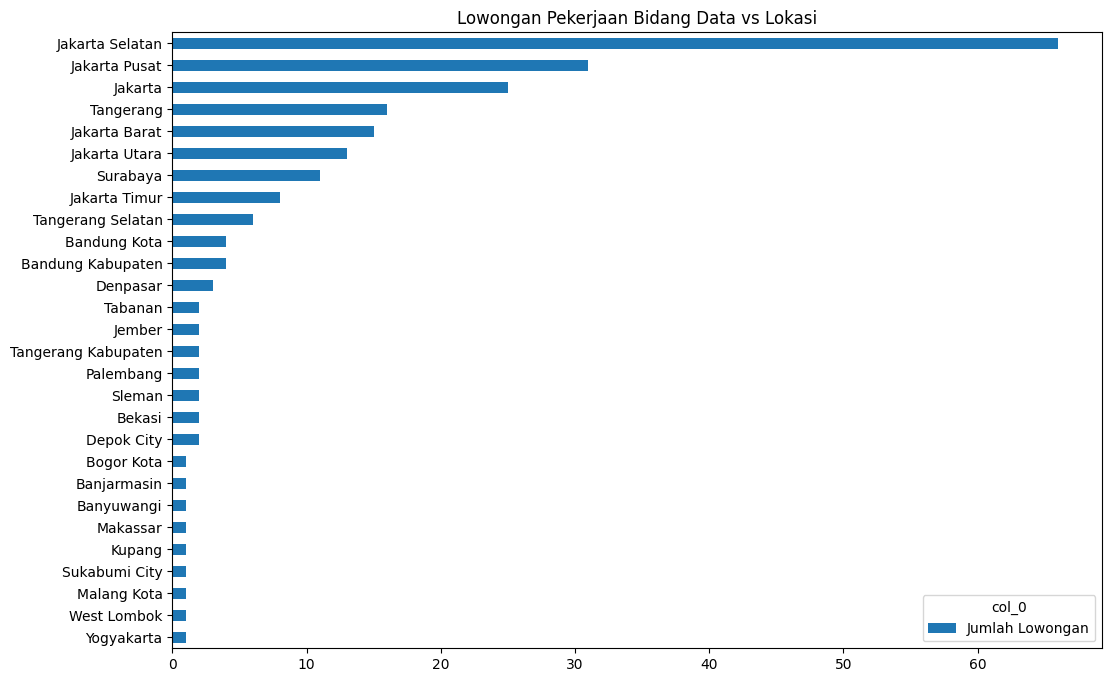

In [236]:
pd.crosstab(
    index = df['lokasi'],
    columns = 'Jumlah Lowongan'
).sort_values(by = 'Jumlah Lowongan').plot(kind = 'barh', ylabel = '', title = 'Lowongan Pekerjaan Bidang Data vs Lokasi', figsize = (12, 8));

**Insight** :
- Jakarta Selatan menjadi wilayah dengan jumlah lowongan pekerjaan paling tinggi.
- Jumlah lowongan pekerjaan di Jakarta Selatan bahkan dua kali selbih banyak daripada daerah Jakarta Pusat yang berada diperingkat dua
- Secara umum lokasi/daerah yang banyak lowongan pekerjaan tersedia didominasi oleh ibu kota yakni DKI Jakarta

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion



Pada kesempatan ini saya akan melakukan beberapa analisis lanjutan.

### Perusahaan yang paling banyak membuka lowongan pekerjaan.

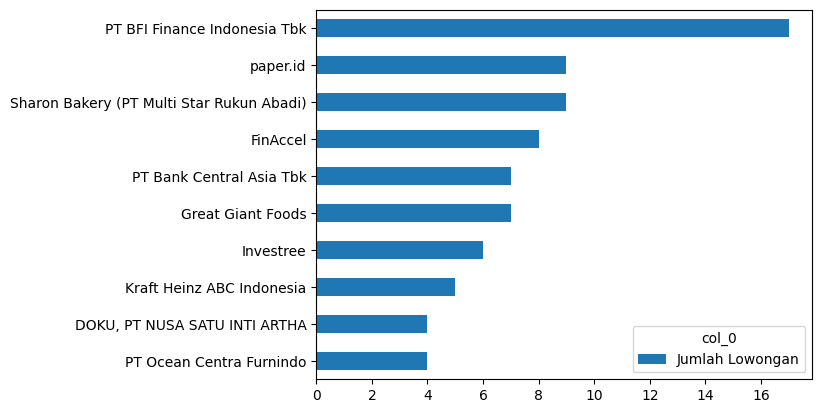

In [135]:
pd.crosstab(
    index = df['perusahaan'],
    columns = 'Jumlah Lowongan'
).sort_values(by = 'Jumlah Lowongan', ascending = True).tail(10).plot(kind = 'barh', ylabel ='');

> **Insight**:
Dari hasil scrapping website, dapat dilihat bahwasannya perusahaan yang sedang membuka lowongan pekerjaan paling banyak ialah **PT. BFI Finance Indonesia Tbk**

Dari lima perusahaan yang paling banyak membuka lowongan, dilakukan analisis lanjutan terkait lokasinya.

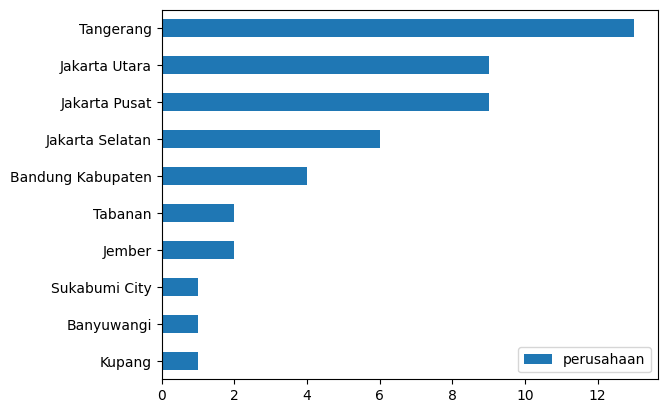

In [138]:
df[df['perusahaan'].isin(['PT BFI Finance Indonesia Tbk', 'paper.id', 'Sharon Bakery (PT Multi Star Rukun Abadi)', 'FinAccel', 'PT Bank Central Asia Tbk'])].pivot_table(
    index = 'lokasi',
    values = 'perusahaan',
    aggfunc = 'count'
).sort_values(by = 'perusahaan', ascending = True).tail(10).plot(kind = 'barh', ylabel ='');

> **Insight**: Ternyata hasil menunjukkan bahwa Tangerang merupakan lokasi yang paling banyak membuka lowongan dari lima perusahaan yang paling banyak membuka lowongan.

Hasil tersebut berbeda dengan hasil lokasi yang paling banyak membuka lowongan pada analisis sebelumnya, yakni Jakarta Selatan dan Tangerang berada di posisi ke empat. Hasil visualisasi di atas malah terjadi sebaliknya.

### Analisis Deadline Submission Lowongan Pekerjaan

Dalam rangka mempersiapkan diri untuk mengikuti seleksi, maka mempersiapkan diri pada kondisi terbaik adalah suatu hal yang tepat. Untuk itu mengetahui jadwal batas terakhir pendaftaran adalah salah satu langkah agar dapat memberikan persiapan yang baik. Selain itu, mengetahui daftar kelompok lowongan yang memiliki batas akhir pendaftaran yang sama akan dapat membantu pendaftar untuk melakukan lamaran pada waktu yang sama dari berbagai lowongan.

Maka diperlukan EDA untuk menghasilkan kolom yang memuat tanggal dan bulan batas terakhir dari pendaftaran melalui kolom `post_and_deadline`.

- Pertama ialah menyiapkan tiga kolom dengan nama
    - `tgl_bulan_dl` yang akan memuat tanggal sekaligus bulan dari batas akhir pendaftaran
    - `tanggal_DL` yang akan memuat tanggal dari batas akhir pendaftaran
    - `bulan_DL` yang akan memuat bulan dari batas akhir pendaftaran
- Agar kolom tersebut tidak kosong dan bisa dibuat, maka data sementara adalah indeks dari dataframe `df`
- Setelah itu dilakukan pengisian data pada ketiga kolom secara looping, yang data mulanya berawal dari kolom `post_and_deadline`
- Data dari `post_and_deadline` di spilt pada kata 'before ' dan disimpan pada kolom `tgl_bulan_dl`
- Kemudian data dari `tgl_bulan_dl` di split kembali dan data tanggal disimpan pada kolom `tanggal_DL`, sedangkan data bulan disimpan pada kolom `bulan_DL`
- Kemudian merubah tipe data pada kolom `bulan_DL` menjadi `category`

In [201]:
df['tgl_bulan_dl'] = df.index
df['tanggal_DL'] = df.index
df['bulan_DL'] = df.index

for i in range (225):
    df['tgl_bulan_dl'][i] = df['post_and_deadline'].str.split('before ')[i][1]
    df['tanggal_DL'][i] = df['tgl_bulan_dl'][i].split(' ')[0]
    df['bulan_DL'][i] = df['tgl_bulan_dl'][i].split(' ')[1]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28464\2771306876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tgl_bulan_dl'][i] = df['post_and_deadline'].str.split('before ')[i][1]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28464\2771306876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal_DL'][i] = df['tgl_bulan_dl'][i].split(' ')[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28464\2771306876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [204]:
df['bulan_DL'] = df['bulan_DL'].astype('category')

Selanjutnya, dibuat data frame dengan nama `monthDL_lowongan` yang berisi hasil crosstab terhadap jumlah lowongan dengan bulan batas terakhir pendaftaran

In [231]:
monthDL_lowongan = pd.crosstab(
    index = df['bulan_DL'],
    columns = 'Jumlah Lowongan'
)

monthDL_lowongan

col_0,Jumlah Lowongan
bulan_DL,
Apr,66
Aug,4
Dec,16
Jan,1
Jul,5
Jun,35
Mar,3
May,88
Oct,5


Agar lebih mudah mendapatkan pemahaman dari hasil visualisasi, maka dilakukan pengurutan index `sort_index` agar sesuai dengan urutan bulan.

In [232]:
month = ["Jan", "Feb", "Mar", "Apr", "May", 'Jun', 'Jul', "Aug", 'Sep', 'Oct', 'Nov', 'Dec']

monthDL_lowongan.index = pd.CategoricalIndex(
    data = monthDL_lowongan.index,
    categories = month,
    ordered = True)

monthDL_lowongan.index

CategoricalIndex(['Apr', 'Aug', 'Dec', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
                  'Oct', 'Sep'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True, dtype='category', name='bulan_DL')

In [233]:
monthDL_lowongan.sort_index()

col_0,Jumlah Lowongan
bulan_DL,
Jan,1
Mar,3
Apr,66
May,88
Jun,35
Jul,5
Aug,4
Sep,2
Oct,5


Karena bulan ini adalah bulan April, maka data sebelum bulan april diabaikan pada visualisasi.

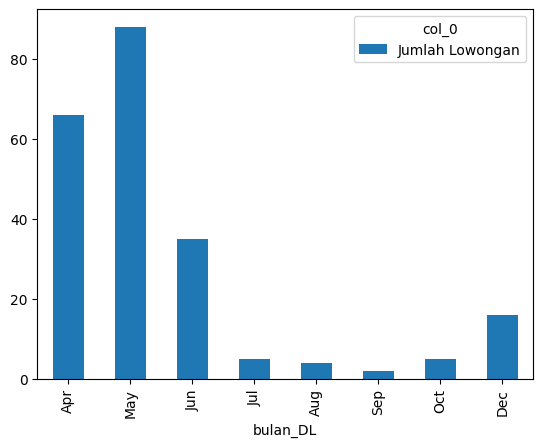

In [237]:
monthDL_lowongan.sort_index().tail(8).plot(kind ='bar');

 **Insight**:
- Bulan Mai adalah bulan dengan paling banyak deadline submission untuk pendafataran lowongan.
- Pada Bulan ini, yakni April, merupakan bulan dengan terbanyak nomor dua untuk deadline submission pendafataran lowongan


### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.